# Boosting
*Try again. Fail again. Fail better*. Samuel Beckett.

1. I Contain Multitudes   
    1.1 Decision Trees  
    1.2 A Song of Bias and Variance   
    1.3 Bagging vs Boosting
2. The Strength of Weak Learners  
    2.1 A short trip to Classtown  
    2.2 The weakest of learners  
3. The AdaBoost Algorithm:  
    3.1 Decision Stumps and Decision Boundaries  
    3.2 Oops, I did it again: AdaBoost Intuition  
    3.3 The Algorithm  
4. Gradient Boosting  
    4.1 All I Want for Boosting is Gradient 
5. AdaBoost in Practice

## 1. I Contain Multitudes
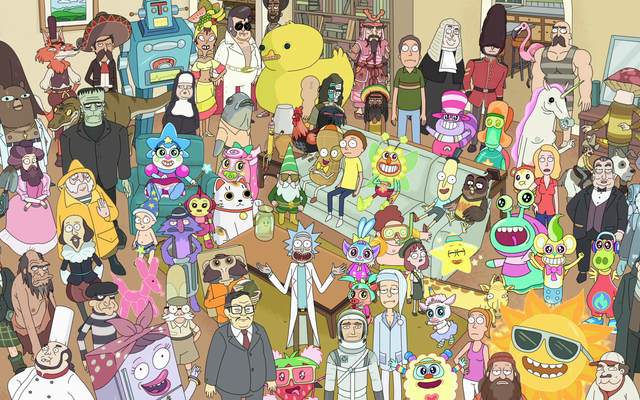


## 1.1 Decision Trees
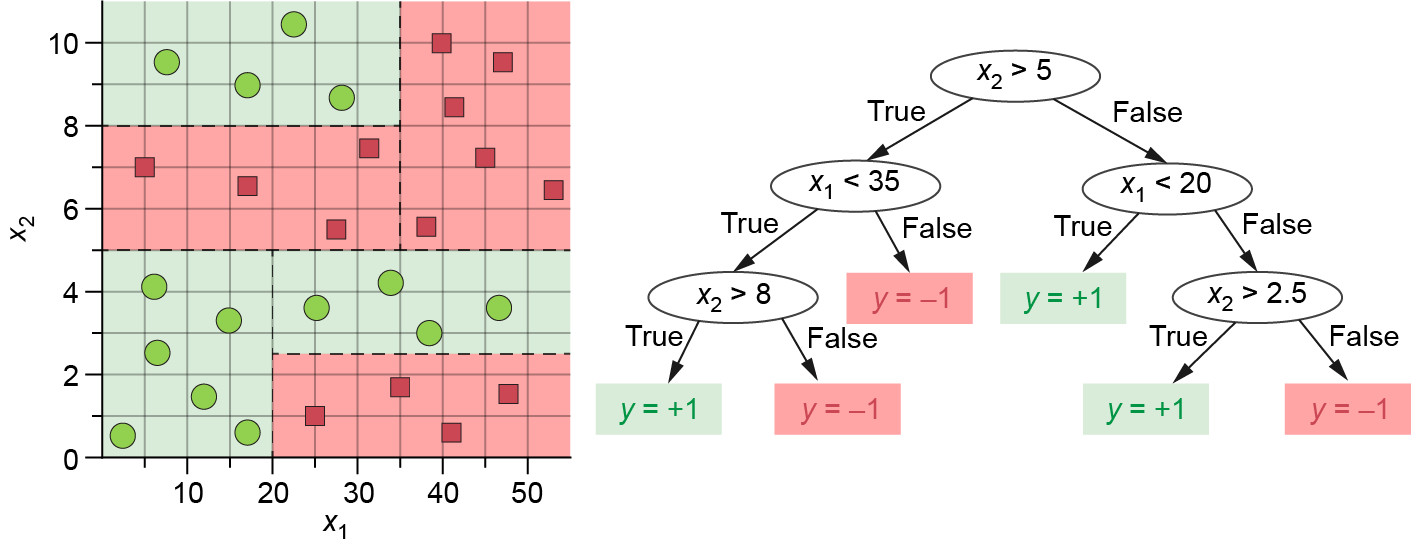


## 1.1 Decision Trees
Define impurity measure, e.g Gini impurity index: $G(N) = \sum_{k}p_k(1-p_k)$.

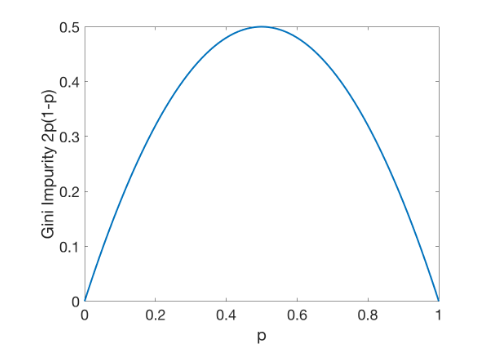

<p style="text-align:center;">Algorithm time complexity: O(?)</p>



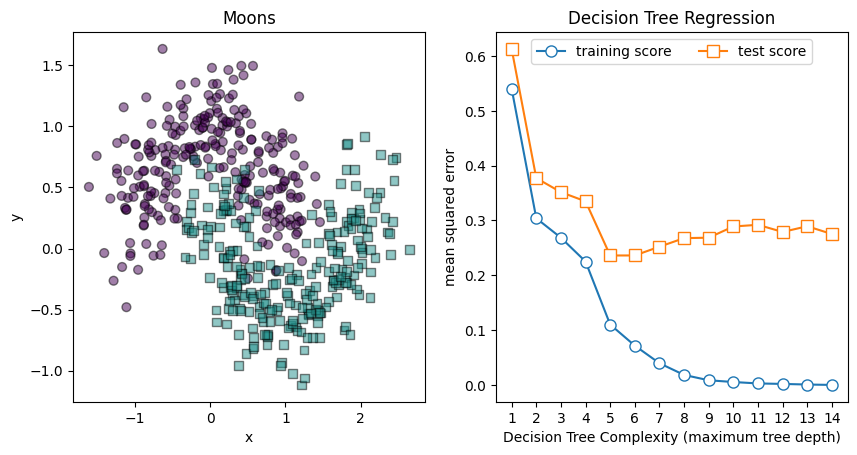

In [23]:
import matplotlib.pyplot as plt
from plot_utils import plot_2d_data

# prepare test dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
y = 2 * y - 1  # Convert labels from [0, 1] to [-1, 1]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)


ax1.set_xlabel('x', fontsize=10);
ax1.set_ylabel('y', fontsize=10);
ax1.set_title('Moons')
plot_2d_data(ax1, X, y, s=40)

# run classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
import numpy as np

subsets = ShuffleSplit(n_splits=10, test_size=0.25, random_state=23)

model = DecisionTreeRegressor()
tree_max_depth = 15
trn_scores, tst_scores = validation_curve(model, X, y, \
                param_name='max_depth', param_range=range(1, tree_max_depth), \
                cv=subsets, scoring='neg_mean_squared_error')
mean_train_score = np.mean(trn_scores, axis=1) 
mean_test_score = np.mean(tst_scores, axis=1)  

# plot scores
ax2.plot(range(1, tree_max_depth), -mean_train_score, linewidth=1.5, marker='o', markersize=8, mfc='w');
ax2.plot(range(1, tree_max_depth), -mean_test_score, linewidth=1.5, marker='s', markersize=8, mfc='w');
ax2.legend(['training score', 'test score'], loc='upper center', ncol=2, fontsize=10)
ax2.set_xlabel('Decision Tree Complexity (maximum tree depth)', fontsize=10);
ax2.set_ylabel('mean squared error', fontsize=10);
ax2.set_xticks(range(1, tree_max_depth));
ax2.set_title('Decision Tree Regression')

## 1.2 A song of Bias and Variance
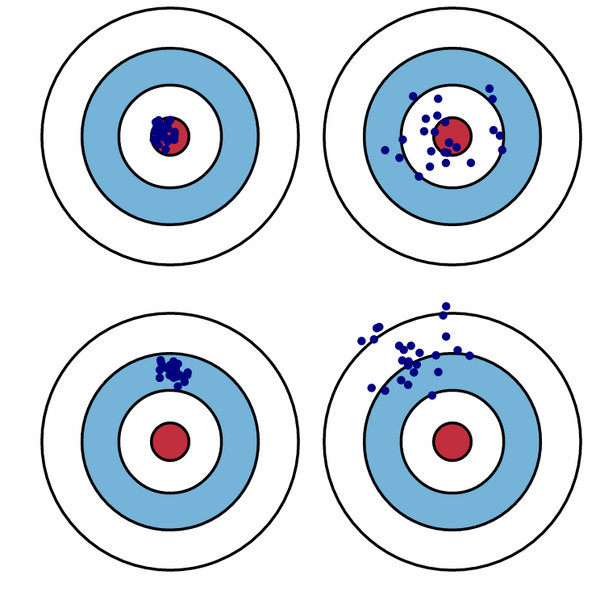

## 1.2 A song of Bias and Variance
- $Y=f(\bf{X}) + \epsilon$: true relationship between Y observations and X covariates.
- $\epsilon$: Gaussian noise with zero mean and standard deviation $\sigma_\epsilon$.
- $\hat{f}(\bf(x))$: model.
\\[
Err(x)=E[(Y - \hat{f}(x))^2]
\\]

\\[
Err(x)=(E[\hat{f}(x)] - f(x))^2 + E[(\hat{f}(x) - E[\hat{f}(x)])^2] + {\sigma_{\epsilon}}^2
\\]

\\[
Err(x)=Bias^2 + Variance + irreducible\quad error
\\]


## 1.3 Bagging vs Boosting
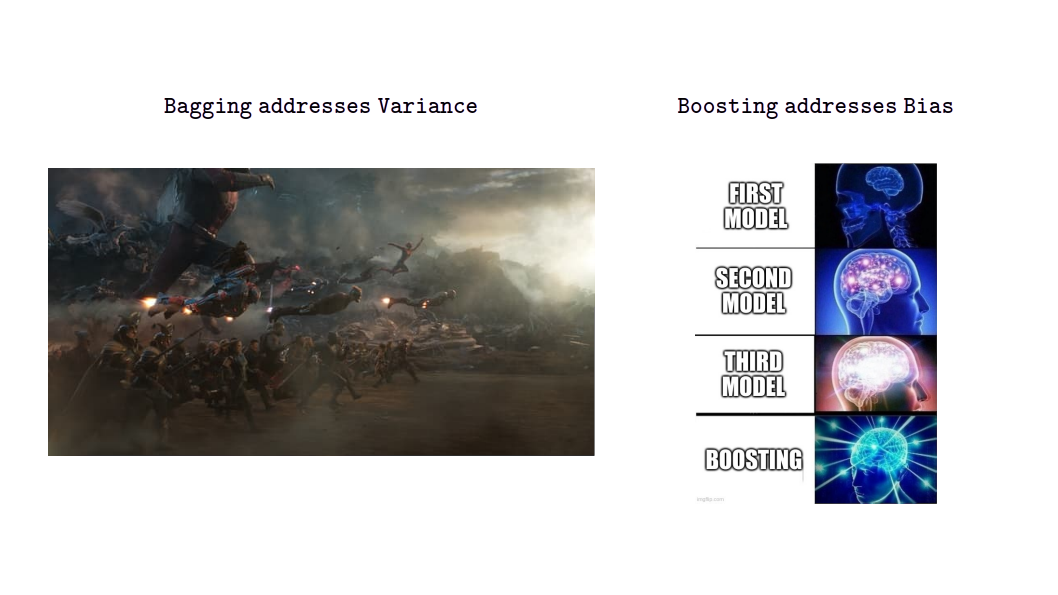

## 2. The strength of weak learners

[<p style="text-align:center;">Hypothesis Boosting Problem (Michael Kerns, 1988)</p>](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf)
Does an efficient learning algorithm that outputs an hypothesis whose performance is only slightly better than random guessing implies the existence of an efficient algorithm that outputs an hypothesis of arbitrary accuracy?


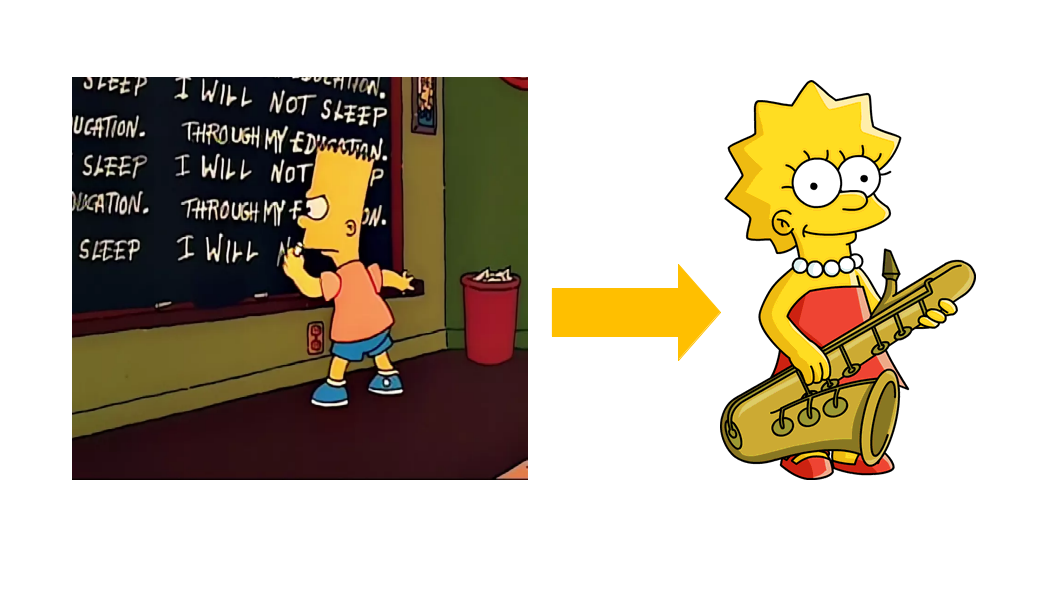

## 2.1 A short Trip to Classtown

- Destination: $\{(x_1, 1),(x_2, 1),(x_3, -1)\}$ 
- labels form a point in $\mathbb{R}^3$
- movement hypothesis $h$: $(h(x_1), h(x_2), h(x_3))$
- total movement: $H=\sum_\limits{t}\alpha_th_t(x)$

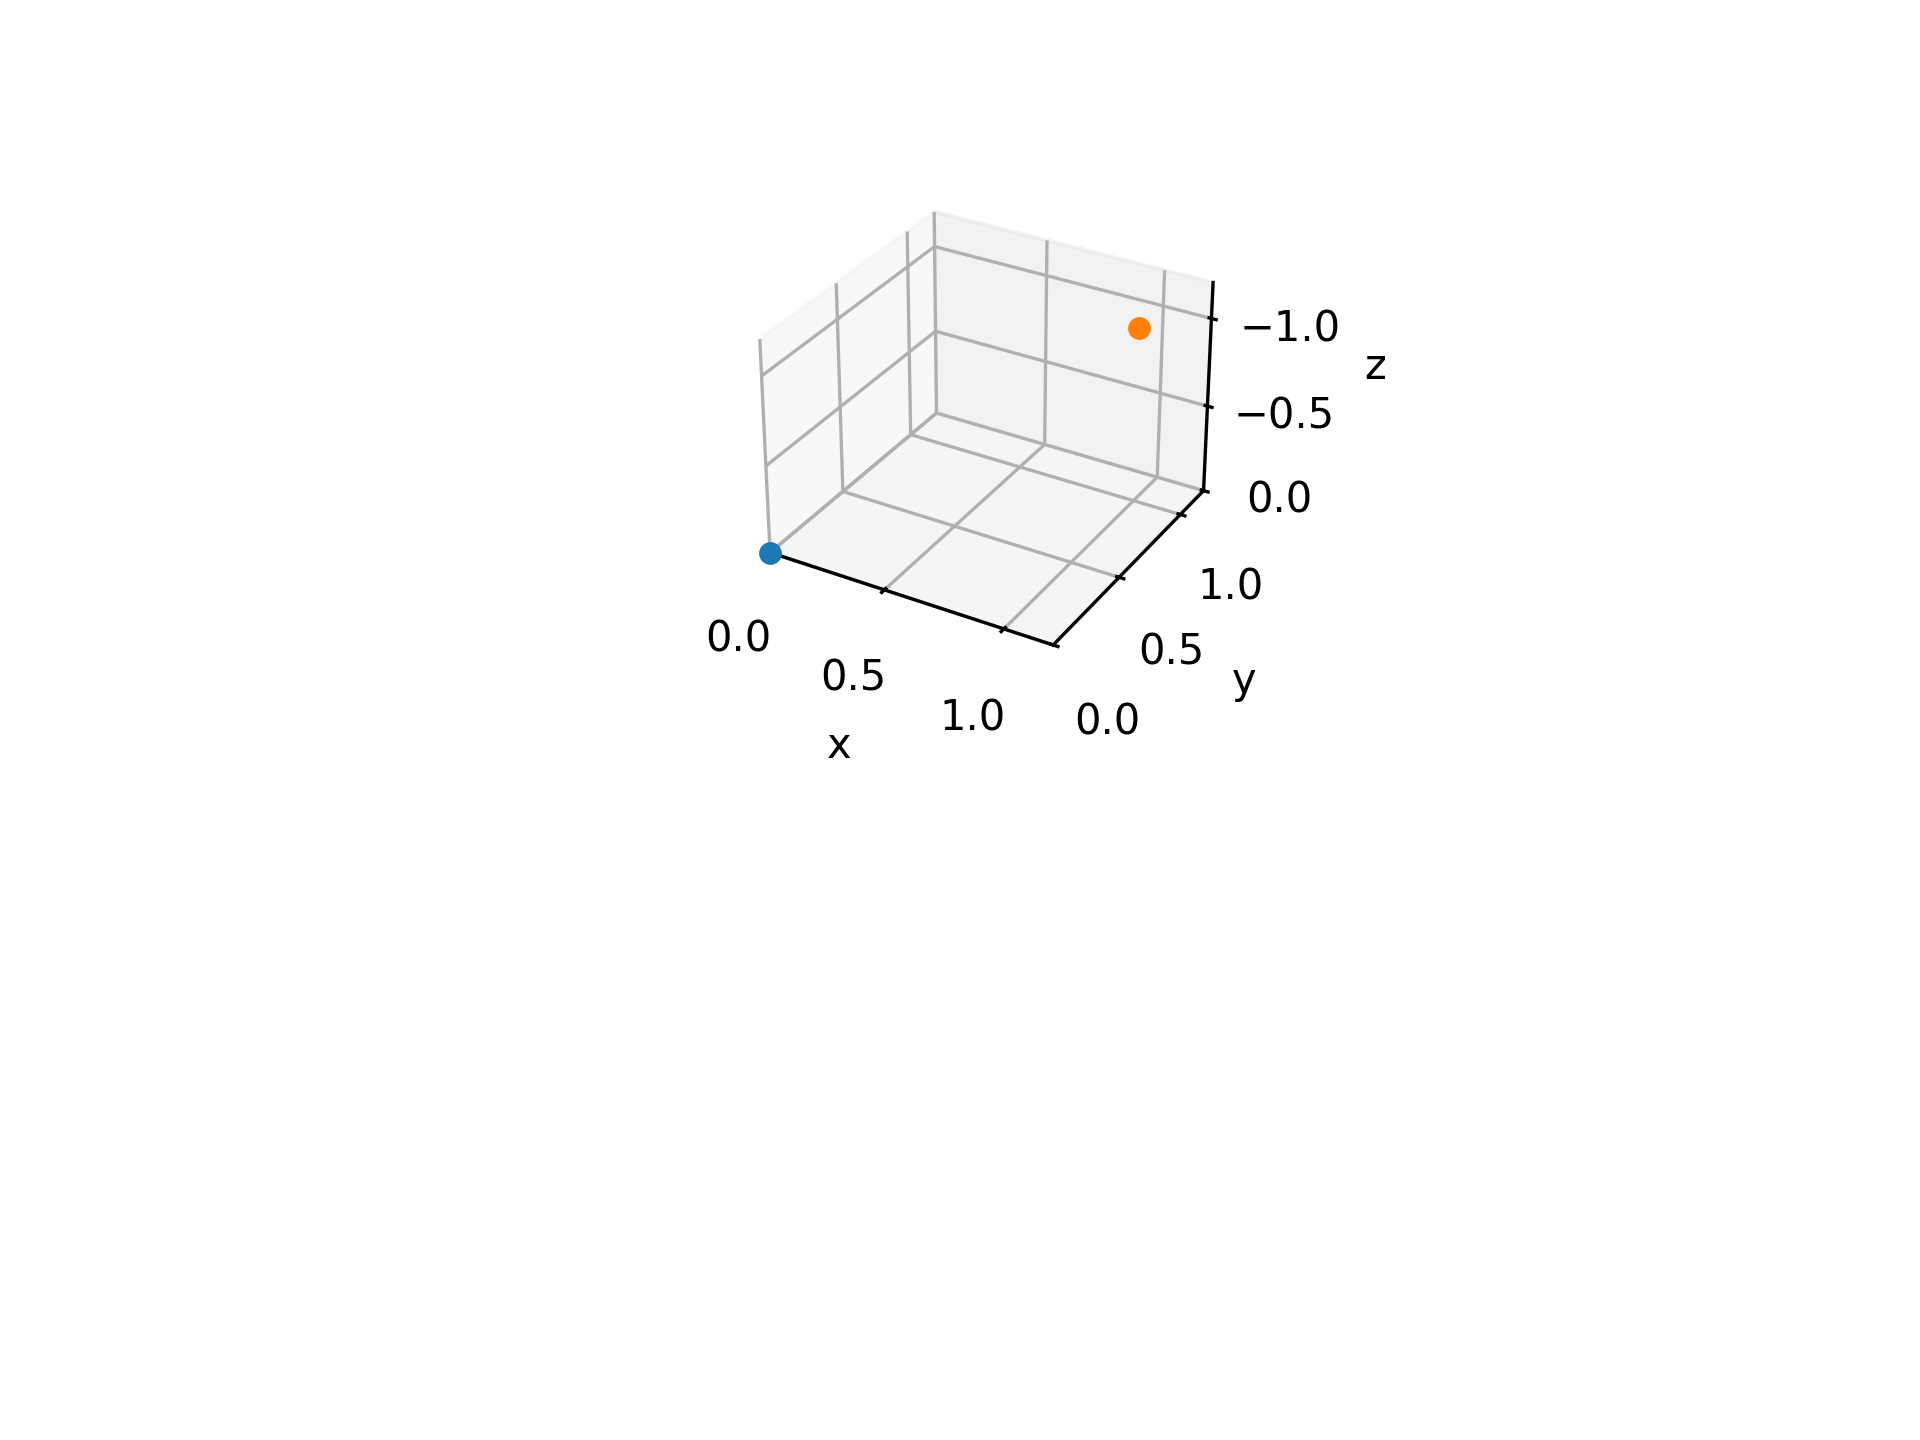


## 2.2 Does it actually work?

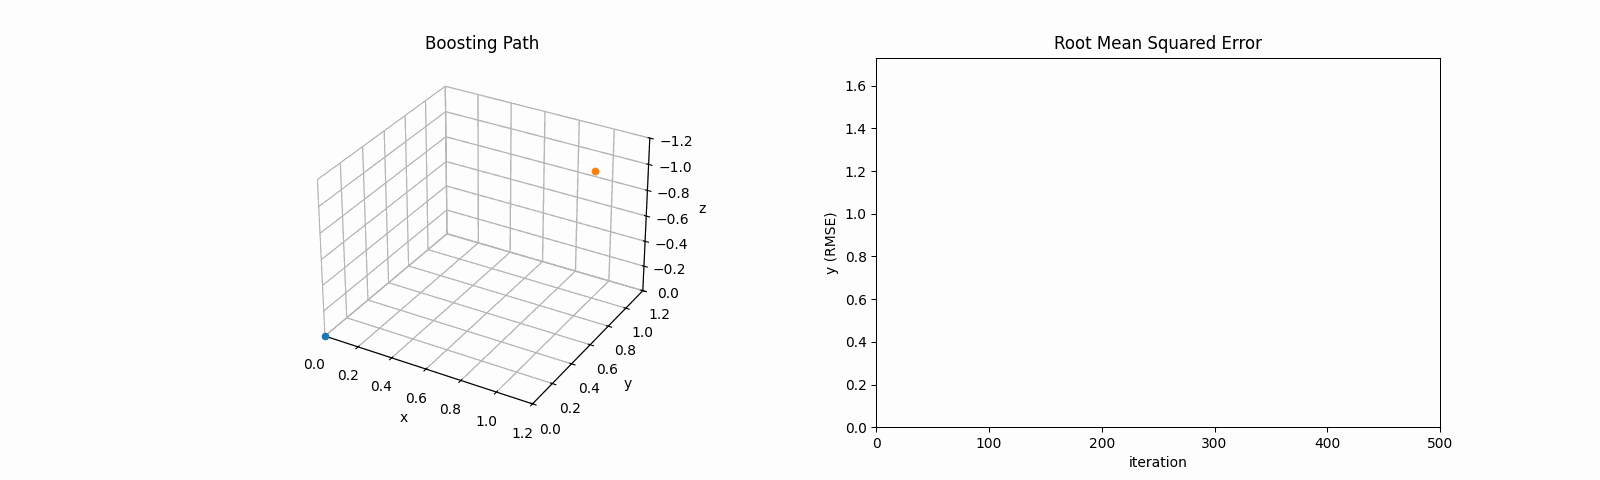

## 3.1 AdaBoost: Decision Stumps and Decision Boundaries

Yes, a weak learner can be boosted into a strong one ([Schapire, 1990](http://rob.schapire.net/papers/strengthofweak.pdf)).

**Decision stump**: a decision tree with only one split.  
**Decision boundary**: line separating classes in a classification problem.

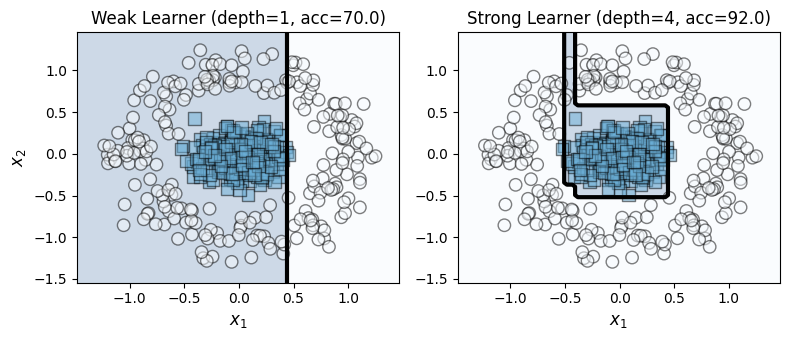

In [1]:
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from plot_utils import plot_2d_data, plot_2d_classifier

# Generate the data
X, y = make_circles(n_samples=500, noise=0.15, factor=0.2, random_state=13)
X, Xtst, y, ytst = train_test_split(X, y, train_size=450, random_state=13)

# Train the classifiers
weak_learner = DecisionTreeClassifier(max_depth=1)
weak_learner.fit(X, y)
weak_learner_err = accuracy_score(ytst, weak_learner.predict(Xtst))

strong_learner = DecisionTreeClassifier(max_depth=4)
strong_learner.fit(X, y)
strong_learner_err = accuracy_score(ytst, strong_learner.predict(Xtst))

# Plot the two trees
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3.5))


title = f"Weak Learner (depth=1, acc={100 * weak_learner_err:3.1f})"
plot_2d_classifier(ax[0], X, y, predict_function=weak_learner.predict, 
                   alpha=0.2, xlabel='$x_1$', ylabel='$x_2$', s=80,
                   title=title, colormap='Blues')
 
title = f"Strong Learner (depth=4, acc={100 * strong_learner_err:3.1f})"
plot_2d_classifier(ax[1], X, y, predict_function=strong_learner.predict, 
                   alpha=0.2, xlabel='$x_1$', ylabel=None, s=80, 
                   title=title, colormap='Blues')


fig.tight_layout()

## 3.2 Oops, I did it again: AdaBoost Intuition

1. Train a decision stump that learns a model to ensure that training examples with higher weights are prioritized.  
2. Update the weights of the training examples such that misclassified examples are assigned higher weights; the worse the error, the higher the weight.


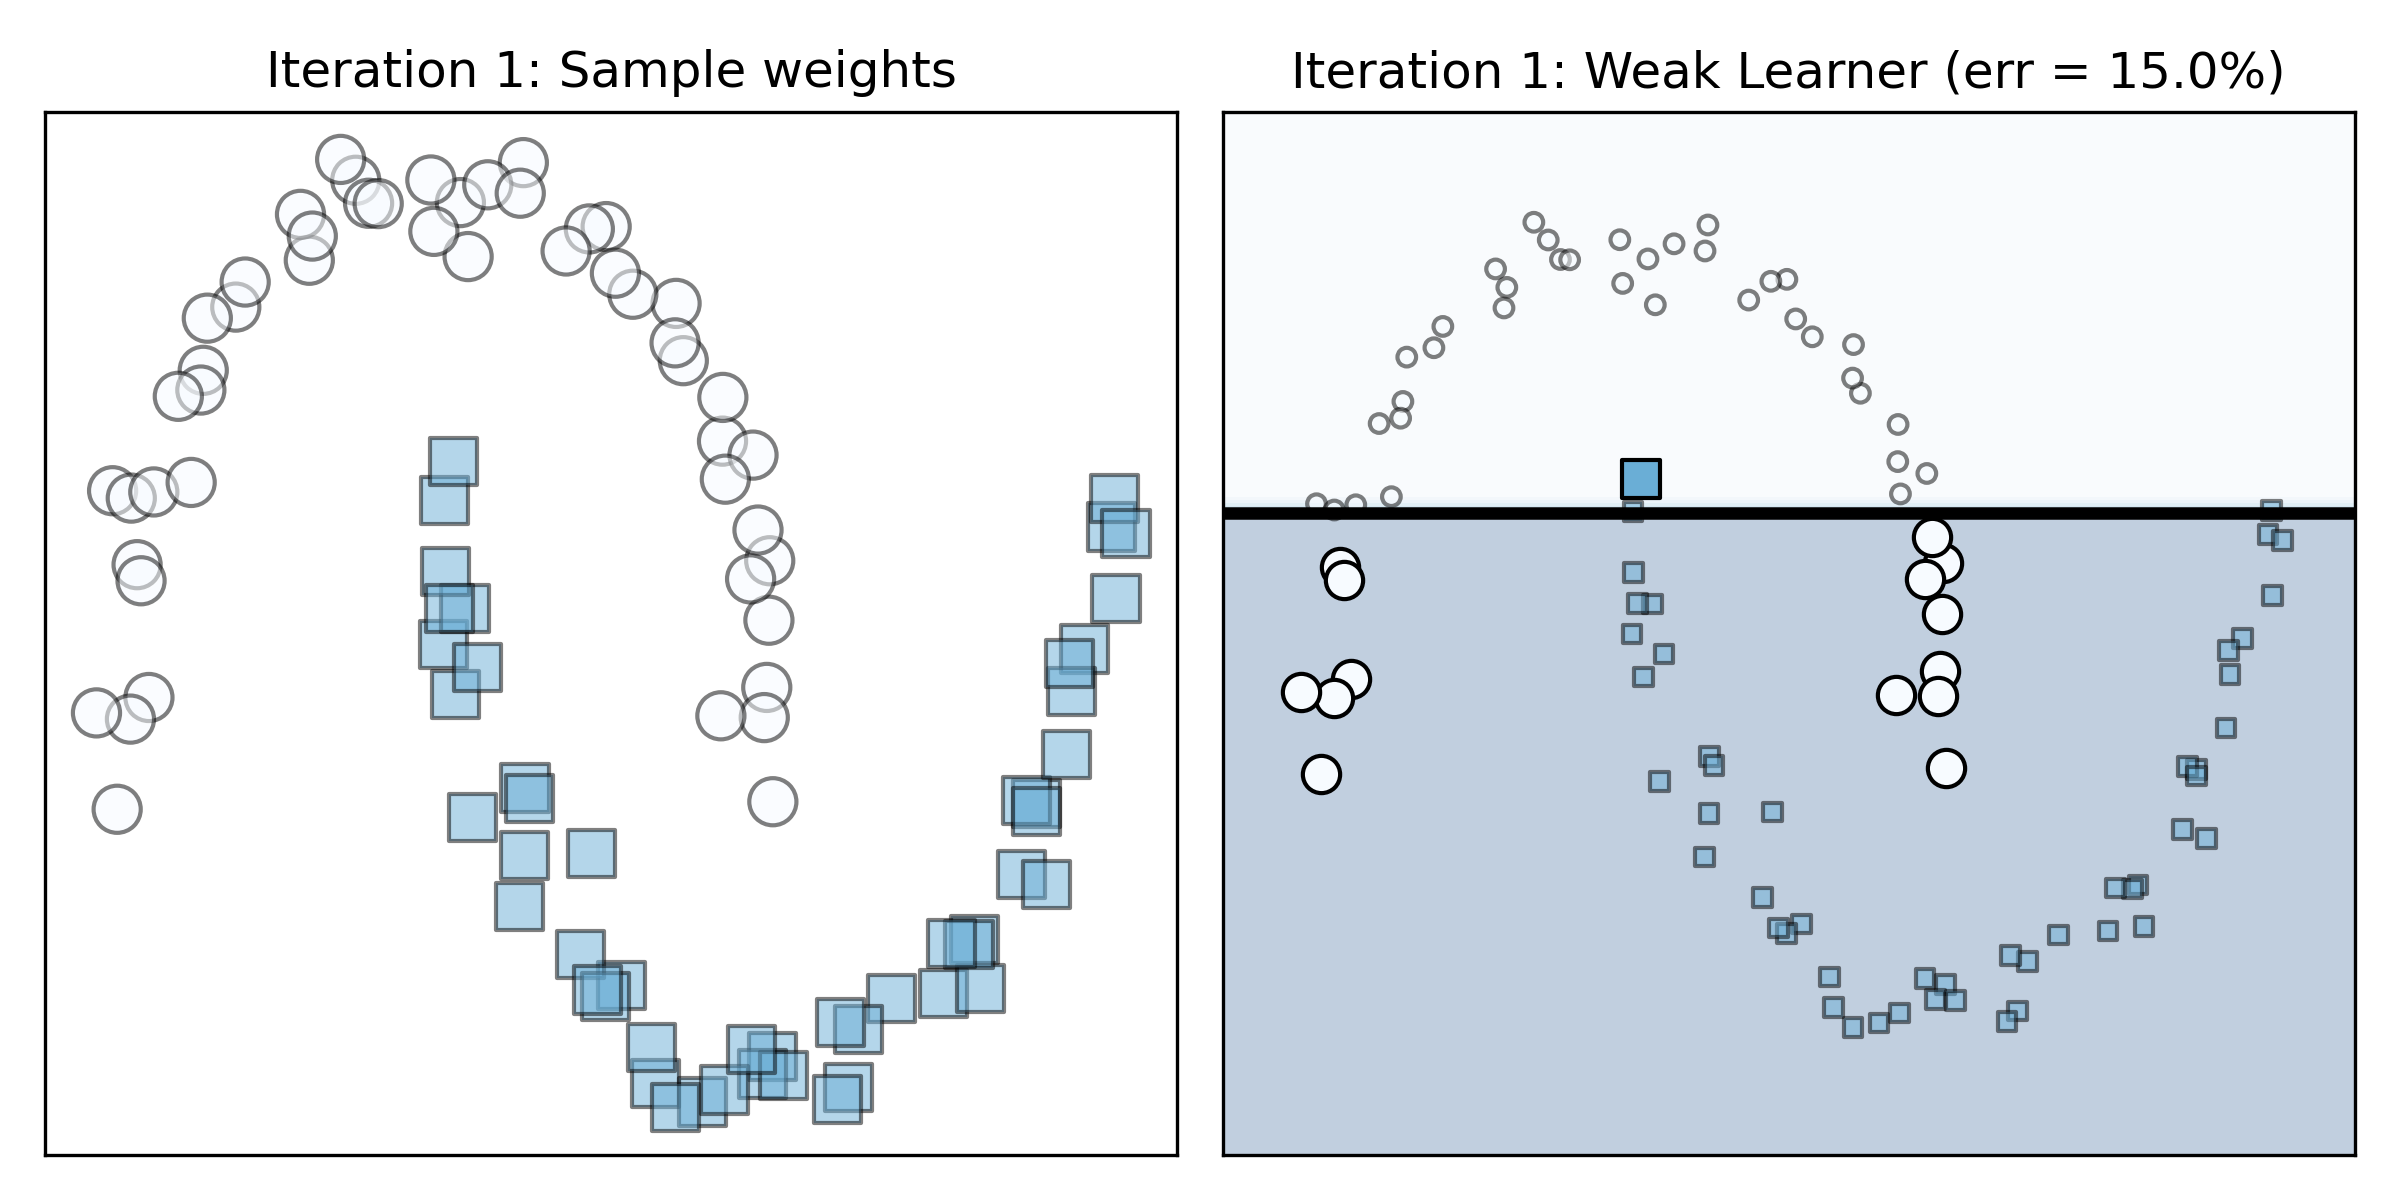


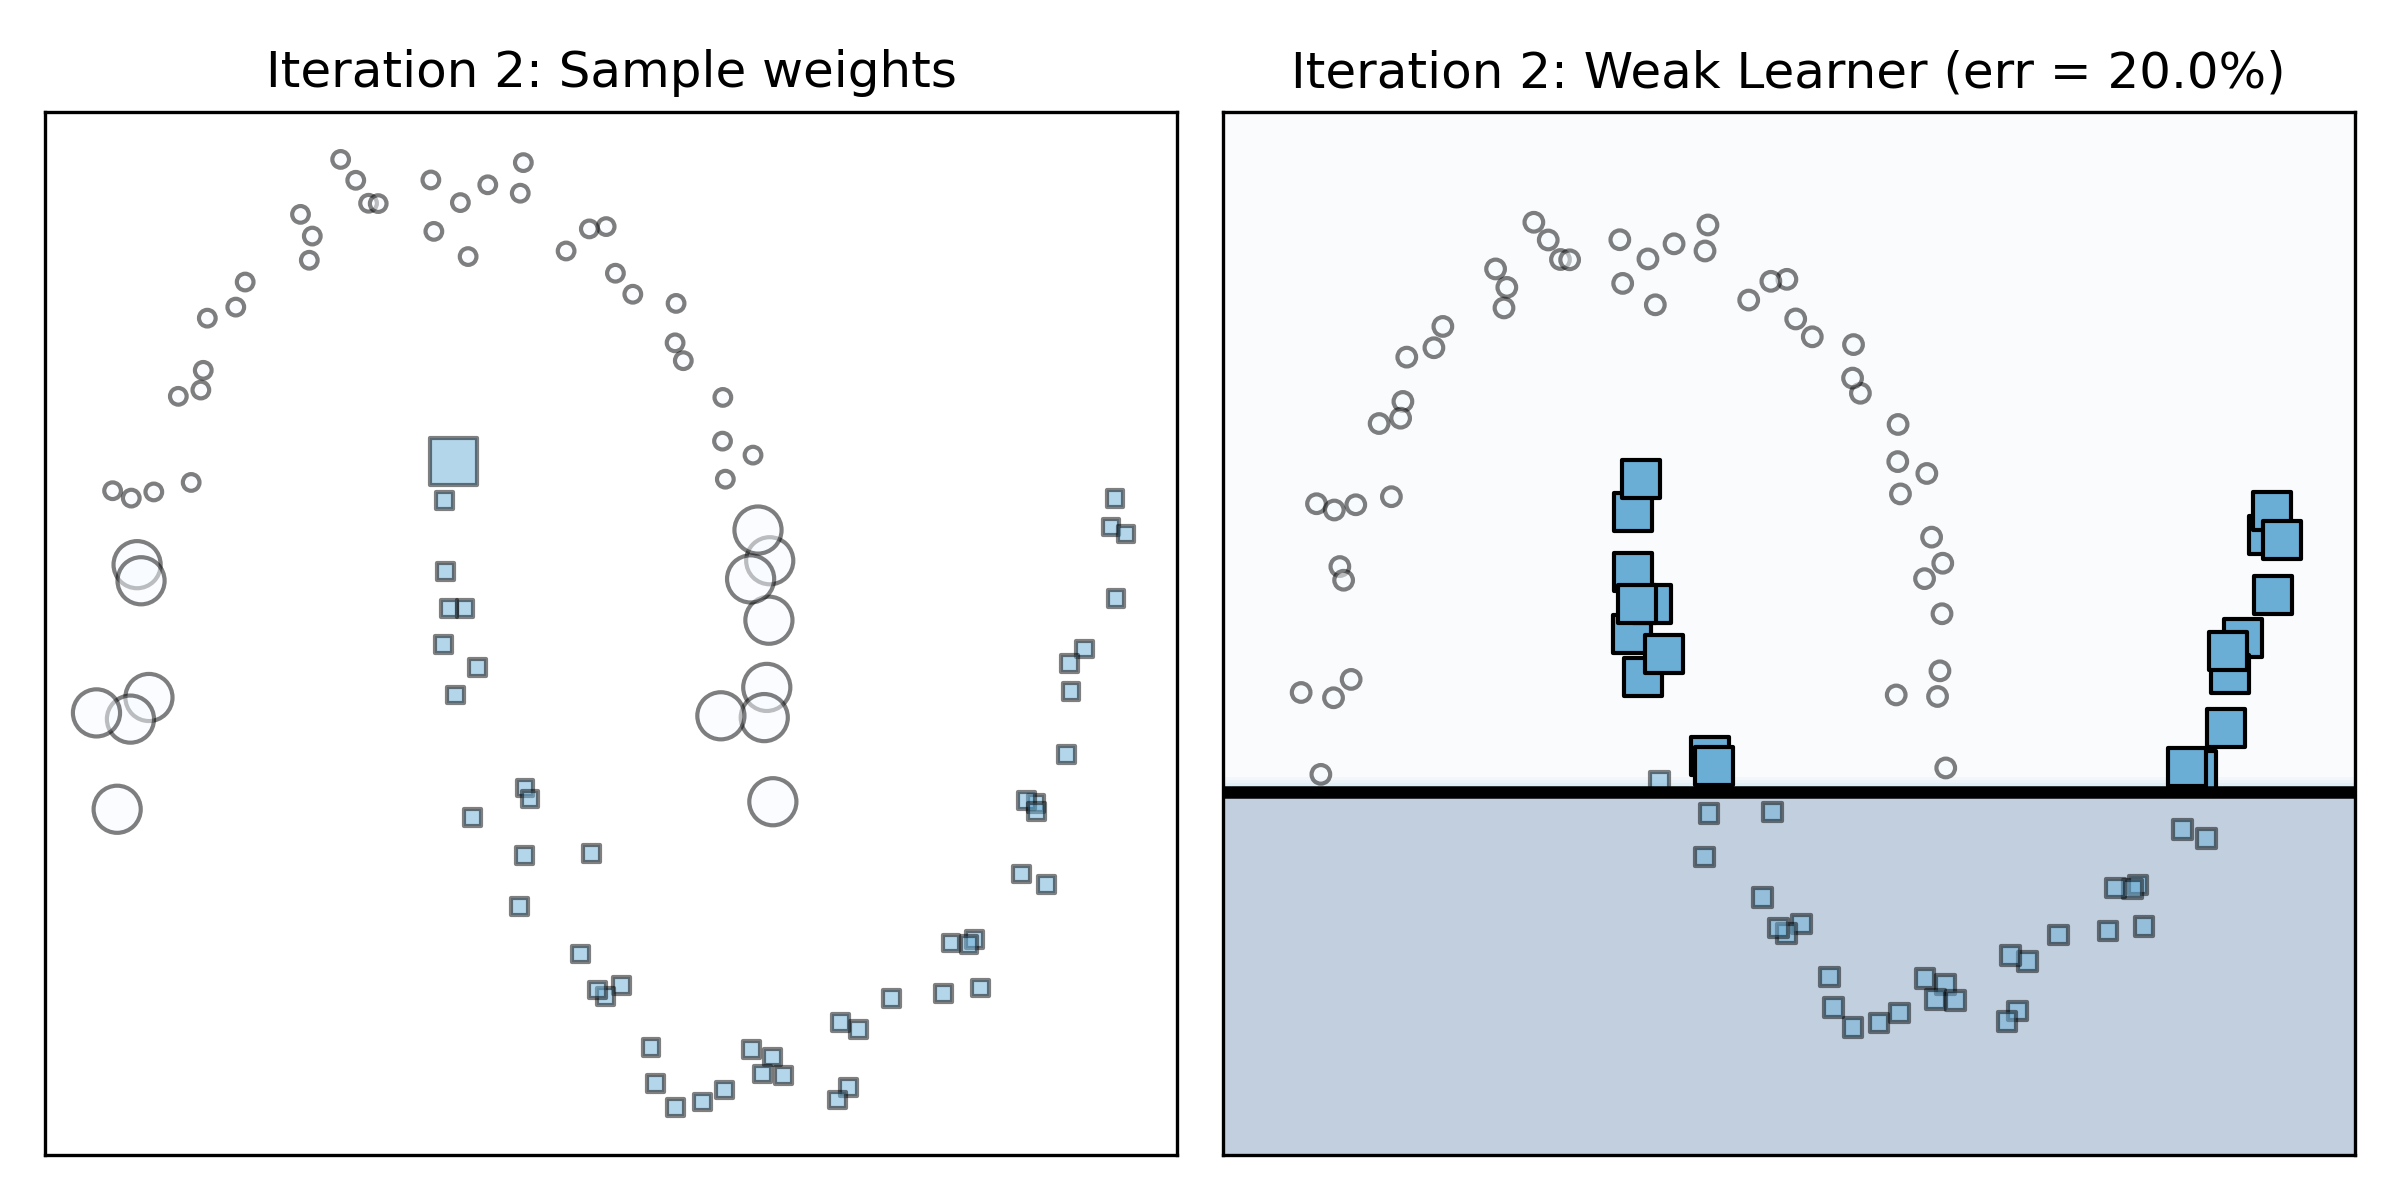

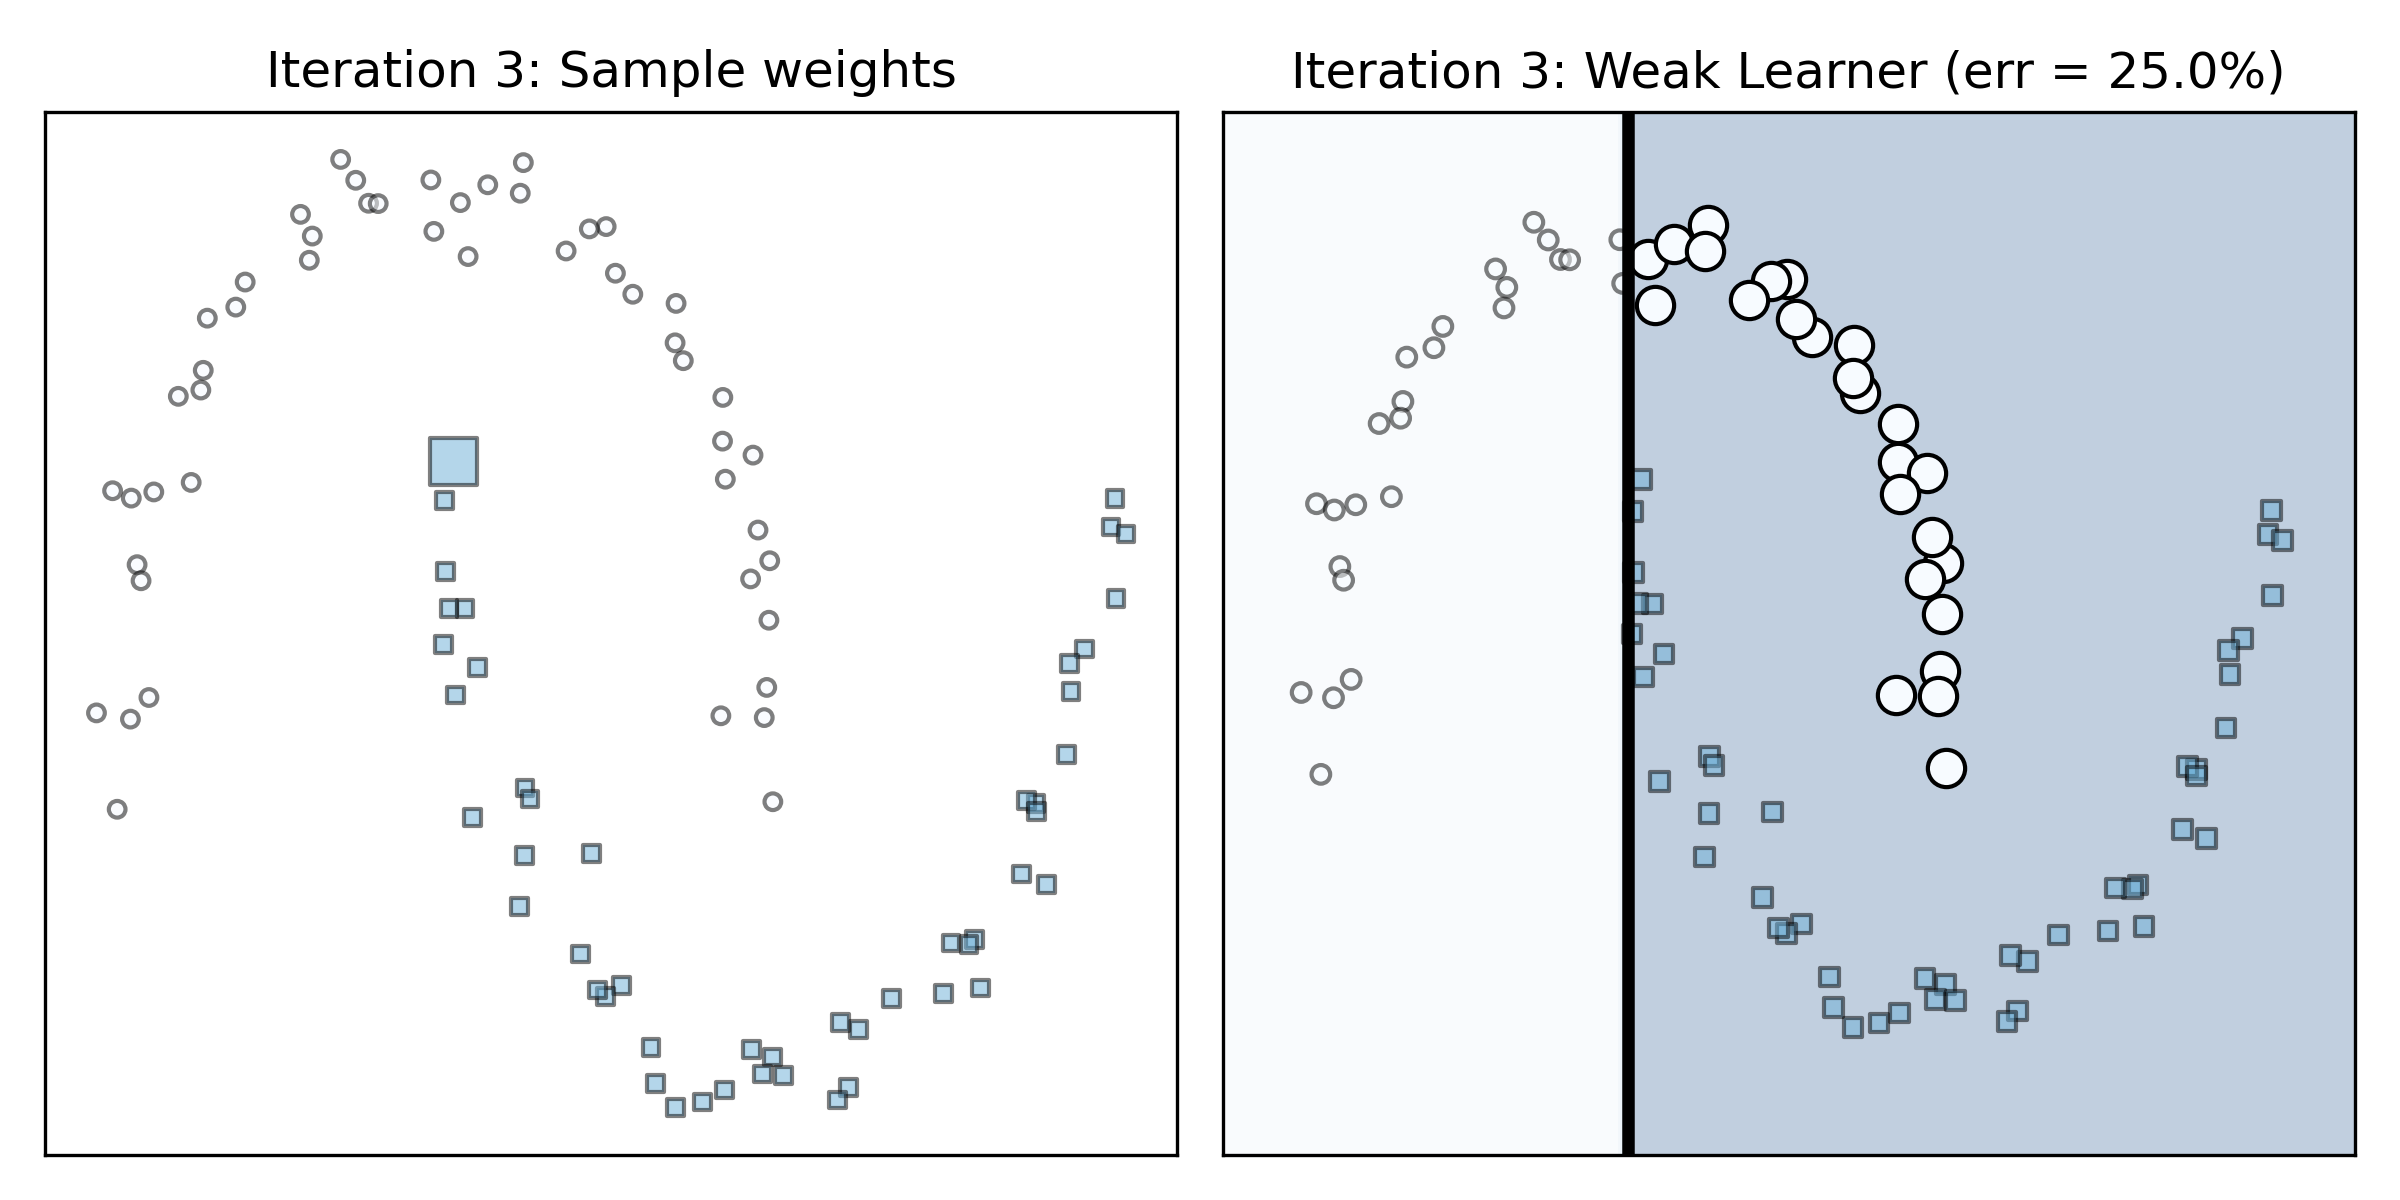

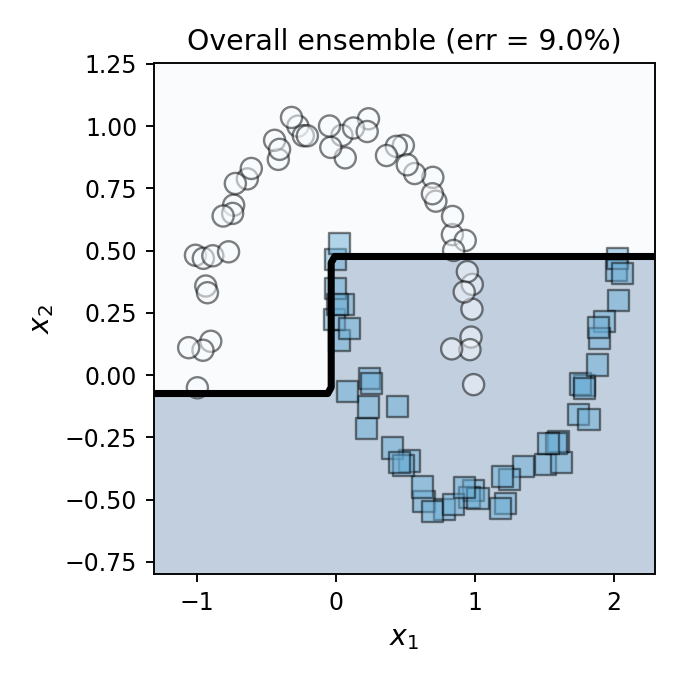

### 3.3 AdaBoost: the Algorithm

1. Train a weak learner $h_t (x)$ using the weighted training examples, $(x_i,y_i,D_i)$  
	- Compute the training error $\epsilon_t$ of the weak learner $h_t(x)$
	- Compute the weight of the weak learner $\alpha_t$ that depends on $\epsilon_t$. 
    - $\epsilon_t=\sum_\limits{i:y_i\neq h(x_i)}D_i$
     
2. Update the weights of the training examples
    - $D_i e^{-\alpha_ty_{i}h(x_i)}$  
    
How is the weight changing for examples correctly classified? How for wrong ones?

The overall classifier after t iterations is just a weighted ensemble: 

\\[ H(x)= \sum_{t=1}^T \alpha_t  h_t (x). \\]


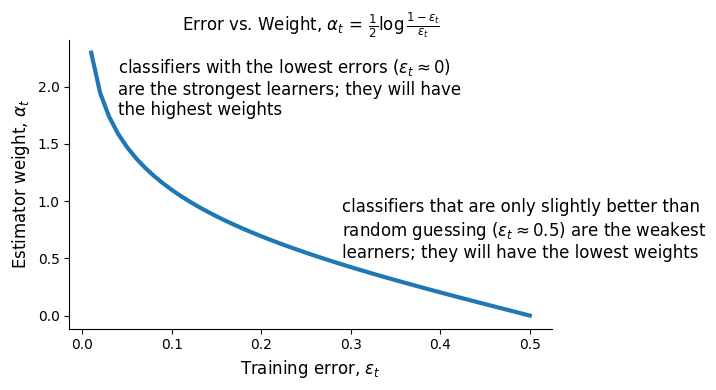

In [3]:
import numpy as np
epsilon = np.linspace(0.01, 0.5, num=50)
alpha = 0.5 * np.log((1 - epsilon) / epsilon)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
ax.plot(epsilon, alpha, linewidth=3)
ax.set_xlabel('Training error, $\\epsilon_t$', fontsize=12)
ax.set_ylabel('Estimator weight, $\\alpha_t$', fontsize=12)
ax.set_title('Error vs. Weight, $\\alpha_t \\, = \\, \\frac{1}{2} \\log{\\frac{1 - \\epsilon_t}{\\epsilon_t}}$')
ax.text(0.04, 1.75, 'classifiers with the lowest errors ($\epsilon_t \\approx 0$)\n'
                    'are the strongest learners; they will have\n'
                    'the highest weights', fontsize=12)

ax.text(0.29, 0.5, 'classifiers that are only slightly better than\n'
                    'random guessing ($\epsilon_t \\approx 0.5$) are the weakest\n'
                    'learners; they will have the lowest weights', fontsize=12)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.tight_layout()

## 4.1 All I want for Boosting is Gradient
[Branin function](https://uqworld.org/t/branin-function/53) as a test function to visualize gradient descent. 
The Branin function is a function of two variables $w_1$ and $w_2$:

\\[
f(w_1, w_2) = a (w_2 - b w_1^2 + c w_1 - r)^2 + s (1-t) \cos{w_1} + s
\\]

where a = 1, b = 5.1/4π2, c = 5/π, r = 6, s = 10, and t = 1/8π are fixed constants.



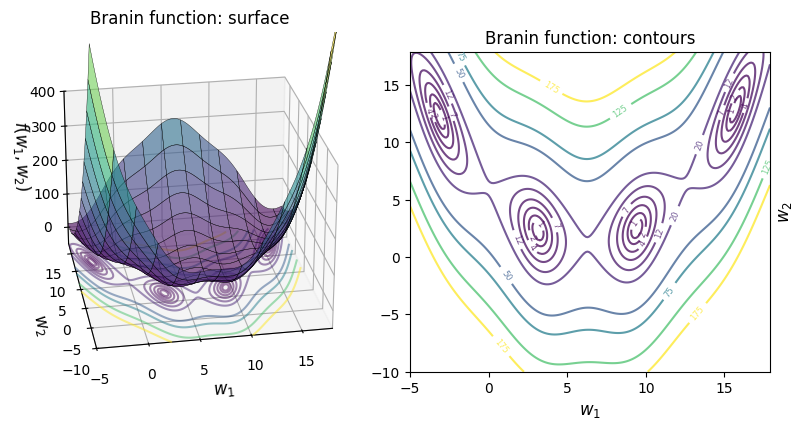

In [6]:
def branin(w, a, b, c, r, s, t):
    return a * (w[1] - b * w[0] ** 2 + c * w[0] - r) ** 2 + s * (1 - t) * np.cos(w[0]) + s


def branin_gradient(w, a, b, c, r, s, t):
    return np.array([2 * a * (w[1] - b * w[0] ** 2 + c * w[0] - r) * (-2 * b * w[0] + c) - s * (1 - t) * np.sin(w[0]),
                     2 * a * (w[1] - b * w[0] ** 2 + c * w[0] - r)])

# Set the constants of the Branin function
a, b, c, r, s, t = 1, 5.1 / (4 * np.pi ** 2), 5 / np.pi, 6, 10, 1 / (8 * np.pi)

# Set plotting boundaries and generate the mesh
w1Min, w1Max, w2Min, w2Max = -5, 18, -10, 18
w1, w2 = np.meshgrid(np.arange(w1Min, w1Max, 0.1),
                     np.arange(w2Min, w2Max, 0.1))

# Compute the Branin function over this mesh
z = np.apply_along_axis(branin, 1, np.c_[w1.ravel(), w2.ravel()], a, b, c, r, s, t)
z = z.reshape(w1.shape)

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_position([0.025, 0.15, 0.5, 0.9])

ax.plot_surface(w1, w2, z, rstride=20, cstride=20, alpha=0.6, linewidth=0.25, edgecolors='k', cmap='viridis')
ax.view_init(elev=25.0, azim=-100.0)
ax.contour(w1, w2, z, zdir='z', levels=np.array([1, 2, 4, 7, 12, 20, 50, 75, 125, 175]), 
           offset=-50, cmap='viridis', alpha=0.5)

ax.set_xlabel('$w_1$', fontsize=12)
ax.set_xlim(w1Min, w1Max)
ax.set_ylabel('$w_2$', fontsize=12)
ax.set_ylim(w2Min, w2Max)
ax.set_zlabel('$f(w_1, w_2)$', fontsize=12)
ax.set_zlim(-50, 400)
ax.set_zticks([0, 100, 200, 300, 400])
ax.dist = 9
ax.set_title('Branin function: surface', fontsize=12);

# Visualize the Branin function in 2d
ax = fig.add_subplot(1, 2, 2)
ax.set_position([0.55, 0.2, 0.45, 0.8])

ctr = ax.contour(w1, w2, z, levels=np.array([1, 2, 4, 7, 12, 20, 50, 75, 125, 175]), cmap='viridis', alpha=0.75)
ax.clabel(ctr, inline=1, fontsize=6)
ax.set_xlabel('$w_1$', fontsize=12)
ax.set_ylabel('$w_2$', fontsize=12)
ax.yaxis.set_label_position("right")
ax.set_title('Branin function: contours', fontsize=12);

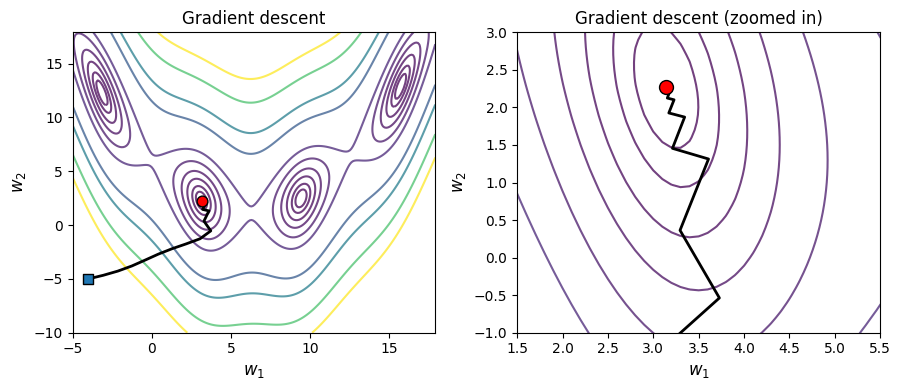

In [8]:
from scipy.optimize import line_search

# Gradient descent with function f, and gradient gr
def gradient_descent(f, g, x_init, max_iter=100, args=()):
    converged = False
    n_iter = 0

    x_old, x_new = np.array(x_init), None
    descent_path = np.full((max_iter + 1, 2), fill_value=np.nan)   # Save the descent path
    descent_path[n_iter] = x_old

    while not converged:
        n_iter += 1
        gradient = -g(x_old, *args)                                # Compute the negative gradient
        direction = gradient / np.linalg.norm(gradient)            # Normalize the gradient 
        step = line_search(f, g, x_old, direction, args=args)      # Compute the step length using line search

        if step[0] is None:                     # If step length doesn't return a useful value, make it 1.0
            distance = 1.0
        else:
            distance = step[0]

        x_new = x_old + distance * direction                    # Compute the update
        descent_path[n_iter] = x_new

        # Update status
        # print('Iter {0:02d}: obj value = {1} (step={2}, dir={3}'.format(n_iter, step[3], step[0], direction))

        err = np.linalg.norm(x_new - x_old)                        # Compute amount of change between x_new and x_old
        if err <= 1e-3 or n_iter >= max_iter:                      # Check for convergence
            converged = True

        x_old = x_new                                              # Get ready for the next iteration

    return x_new, descent_path

# Initialize and perform gradient descent
w_init = np.array([-4, -5])
w_optimal, w_path = gradient_descent(branin, branin_gradient, w_init, args=(a, b, c, r, s, t))

# Plot optimization path over all iterations
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
ax[0].contour(w1, w2, z, levels=np.array([1, 2, 4, 7, 12, 20, 50, 75, 125, 175]), cmap='viridis', alpha=0.75)
ax[0].plot(w_path[:, 0], w_path[:, 1], 'k', linewidth=2)
ax[0].scatter(w_init[0], w_init[1], s=60, marker='s', edgecolor='k', zorder=2)
ax[0].scatter(w_optimal[0], w_optimal[1], s=60, c='r', edgecolor='k', zorder=2)
ax[0].set_xlabel('$w_1$', fontsize=12)
ax[0].set_ylabel('$w_2$', fontsize=12)
ax[0].set_title('Gradient descent', fontsize=12)

# Plot optimization path zoomed in
ax[1].contour(w1, w2, z, levels=np.array([1, 2, 4, 7, 12, 20, 50, 75, 125, 175]), cmap='viridis', alpha=0.75)
ax[1].plot(w_path[:, 0], w_path[:, 1], 'k', linewidth=2)
ax[1].scatter(w_optimal[0], w_optimal[1], s=100, c='r', edgecolor='k', zorder=2)
ax[1].set_xlim(1.5, 5.5)
ax[1].set_ylim(-1, 3)
ax[1].set_xlabel('$w_1$', fontsize=12)
ax[1].set_ylabel('$w_2$', fontsize=12)
ax[1].set_title('Gradient descent (zoomed in)', fontsize=12)

fig.tight_layout()

## 4.2 Gradient Boosting Intuition

- Loss function $L$
- Model at step $t$: $H_t(x)=H_{t-1}(x) + \alpha_t  h_t (x)$
- Choose $h_t(x)$ to be the closest to the direction of the negative gradient of $L$: $-\frac{\partial L}{\partial H}\big|_{H=H_{t-1}(x)}$

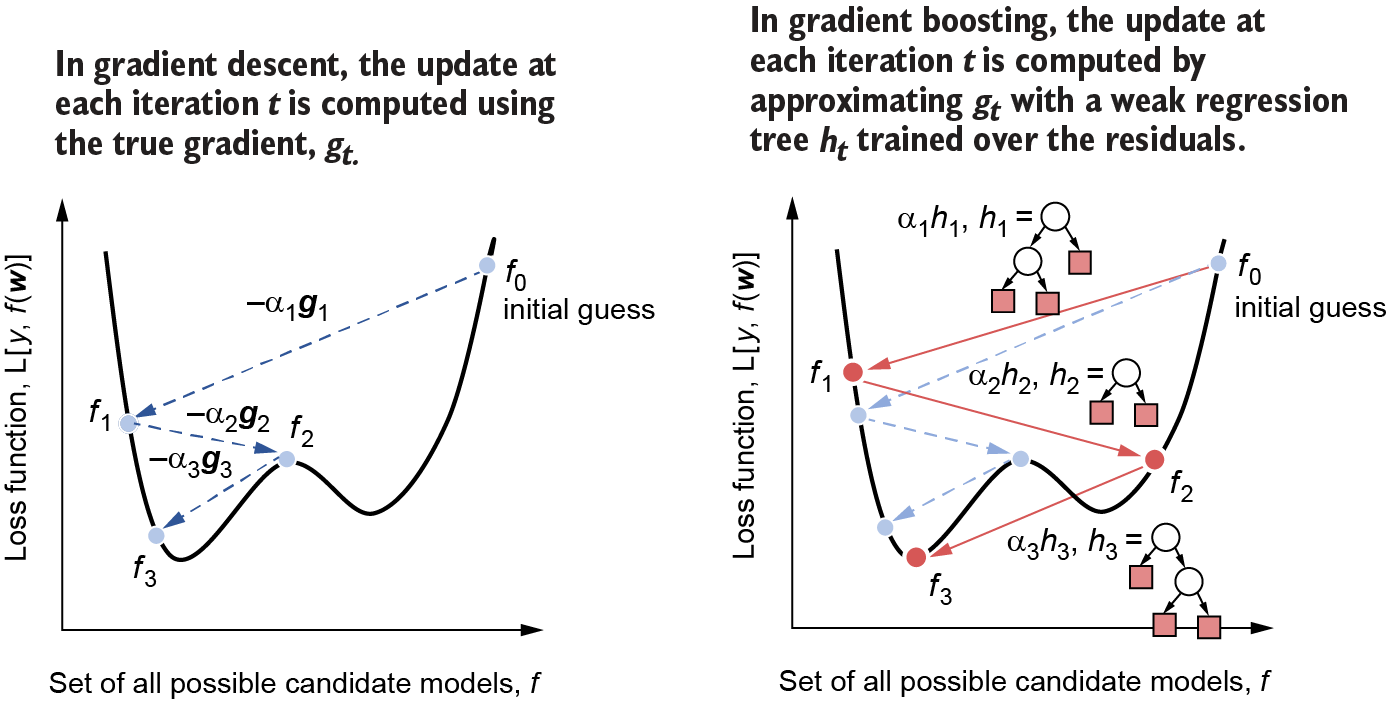   

## 4.3 AdaBoost vs Gradient Boosting

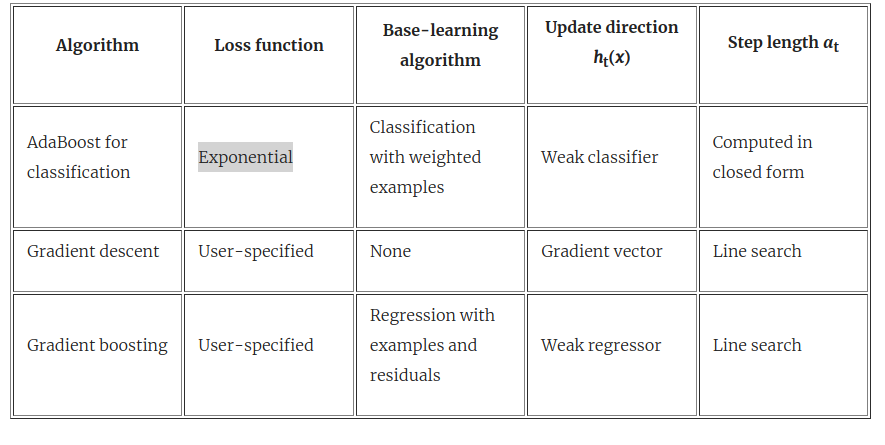

## Resources

- [Ensemble Methods for Machine Learning. Gautam Kunapuli](https://www.manning.com/books/ensemble-methods-for-machine-learning)
- [Ensemble Methods for Machine Learning, GitHub companion repo](https://github.com/gkunapuli/ensemble-methods-notebooks)
- [CS4780 Cornell University, Kilian Weinberger](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/)
- [Probably Approximately Correct Learning](https://en.wikipedia.org/wiki/Probably_approximately_correct_learning)
- [CS4780 on YouTube, Kilian Weinberger](https://www.youtube.com/playlist?list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS)
- [Hypothesis Boosting Problem. (M. Kerns, 1988](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf)
- [Boosting: Foundation and Algorithms. R. Schapire](https://direct.mit.edu/books/oa-monograph/5342/BoostingFoundations-and-Algorithms)
- [Greedy Function Approximation:A gradient boosting machine. J.H Friedman](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full)
- [More on Grogu](https://www.google.com/search?sca_esv=de78155c85c214eb&sxsrf=ADLYWIKHBjwUoojI9uIUZq6MWME2-T2zGg:1733104924222&q=cute+grogu&uds=ADvngMjcH0KdF7qGWtwTBrP0nt7dR1sv592jfXV3rDA30PV-7Z9vCE_9atFZ-DCbtdBtkEaTSAWsDeANMXlIFYWrPYCLmcITsSjdN_KoUoRl-gr21CjMubx_4DK38W28V6o4cryDNrje&udm=2&sa=X&ved=2ahUKEwizm_f6_oeKAxU4_7sIHX27EBEQxKsJegQIChAB&ictx=0&biw=1541&bih=1047&dpr=1)
